### Your Goal: Our task is to use binary classification to predict a patient's smoking status given information about various other health indicators.

#### I have collected this data set from Kaggle, which includes various health parameters like age, cholesterol,                height,                      weight, hemoglobin etc. 
#### & whether patients quit smoking or not.

#### Dataset Description -

            age : 5-years gap

            height(cm)

            weight(kg)

            waist(cm) : Waist circumference length

            eyesight(left)

            eyesight(right)

            hearing(left)

            hearing(right)

            systolic : Blood pressure

            relaxation : Blood pressure

            fasting blood sugar

            Cholesterol : total

            triglyceride

            HDL : cholesterol type

            LDL : cholesterol type

            hemoglobin

            Urine protein

            serum creatinine

            AST : glutamic oxaloacetic transaminase type

            ALT : glutamic oxaloacetic transaminase type

            Gtp : γ-GTP

            dental caries

            smoking

                                 - - - - - - - - X X X X X X X X - - - - - - - -

# Importing required library

In [1]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 25)

### Importing Data Set

In [2]:
# Importing Data Set
data = pd.read_csv('train.csv')
data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


In [3]:
# Shape
print(data.shape)

(159256, 24)


### Shape of our data set is Col - 24 & Rows - 159256

In [4]:
# Null Values
data.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

### After checking for null values, we can see that there are no null values present in the data set!

In [5]:
# Duplicate Values
print(data.duplicated().sum())

0


In [6]:
print("Number of Unique Values:")
print("------------------------")
display(data.nunique())
print("\n")

Number of Unique Values:
------------------------


id                     159256
age                        18
height(cm)                 14
weight(kg)                 28
waist(cm)                 531
eyesight(left)             20
eyesight(right)            17
hearing(left)               2
hearing(right)              2
systolic                  112
relaxation                 75
fasting blood sugar       229
Cholesterol               227
triglyceride              392
HDL                       108
LDL                       222
hemoglobin                134
Urine protein               6
serum creatinine           28
AST                       140
ALT                       188
Gtp                       362
dental caries               2
smoking                     2
dtype: int64

### There is no duplicate value present in the data set.

In [7]:
# Info and  Dtypes of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

### After checking the data types of the columns, we can say that there are no missed classified data types.

In [8]:
# Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0


### Summary for all the columns in the provided data:

1. **ID:**
   - Count: 159,256
   - Mean: 79,627.5
   - Standard Deviation: 45,973.39
   - Minimum: 0
   - 25th Percentile: 39,813.75
   - Median (50th Percentile): 79,627.5
   - 75th Percentile: 119,441.25
   - Maximum: 159,255

2. **Age:**
   - Mean: 44.31 years
   - Standard Deviation: 11.84 years
   - Minimum: 20 years
   - 25th Percentile: 40 years
   - Median (50th Percentile): 40 years
   - 75th Percentile: 55 years
   - Maximum: 85 years

3. **Height:**
   - Mean: 165.27 cm
   - Standard Deviation: 8.82 cm
   - Minimum: 135 cm
   - 25th Percentile: 160 cm
   - Median (50th Percentile): 165 cm
   - 75th Percentile: 170 cm
   - Maximum: 190 cm

4. **Weight:**
   - Mean: 67.14 kg
   - Standard Deviation: 12.59 kg
   - Minimum: 30 kg
   - 25th Percentile: 60 kg
   - Median (50th Percentile): 65 kg
   - 75th Percentile: 75 kg
   - Maximum: 130 kg

5. **Waist Circumference:**
   - Mean: 83.00 cm
   - Standard Deviation: 8.96 cm
   - Minimum: 51 cm
   - 25th Percentile: 77 cm
   - Median (50th Percentile): 83 cm
   - 75th Percentile: 89 cm
   - Maximum: 127 cm

6. **Eyesight (Left and Right):**
   - Mean: 1.01 (approximate)
   - Standard Deviation: 0.40 (approximate)

7. **Hearing (Left and Right):**
   - Mean: 1.02 (approximate)
   - Standard Deviation: 0.15 (approximate)

8. **Systolic Blood Pressure:**
   - Mean: 122.50 mmHg
   - Standard Deviation: 12.73 mmHg

9. **Diastolic Blood Pressure (Relaxation):**
   - Mean: 76.87 mmHg
   - Standard Deviation: 8.99 mmHg

10. **Fasting Blood Sugar:**
    - Mean: 98.35 mg/dL
    - Standard Deviation: 15.33 mg/dL

11. **Cholesterol:**
    - Mean: 195.80 mg/dL
    - Standard Deviation: 28.40 mg/dL

12. **Triglyceride:**
    - Mean: 127.62 mg/dL
    - Standard Deviation: 66.19 mg/dL

13. **HDL Cholesterol:**                           
    - Mean: 55.85 mg/dL

14. **LDL Cholesterol:**
    - Mean: 114.61 mg/dL

15. **Hemoglobin:**
    - Mean: 14.80 g/dL

16. **Urine Protein:**
    - Mean: 1.07 (approximate)

17. **Serum Creatinine:**
    - Mean: 0.89 mg/dL

18. **AST (Aspartate Aminotransferase):**
    - Mean: 25.52 U/L

19. **ALT (Alanine Aminotransferase):**
    - Mean: 26.55 U/L

20. **GTP:**
    - Mean: 36.22 U/L

21. **Dental Caries:**
    - Mean: 0.20 (approximate)

22. **Smoking:**
    - Mean: 0.44 (approximate)

These statistics provide a comprehensive summary for each column in the dataset, including count, mean, standard deviation, minimum, percentiles, and maximum values.

<Figure size 1500x1200 with 0 Axes>

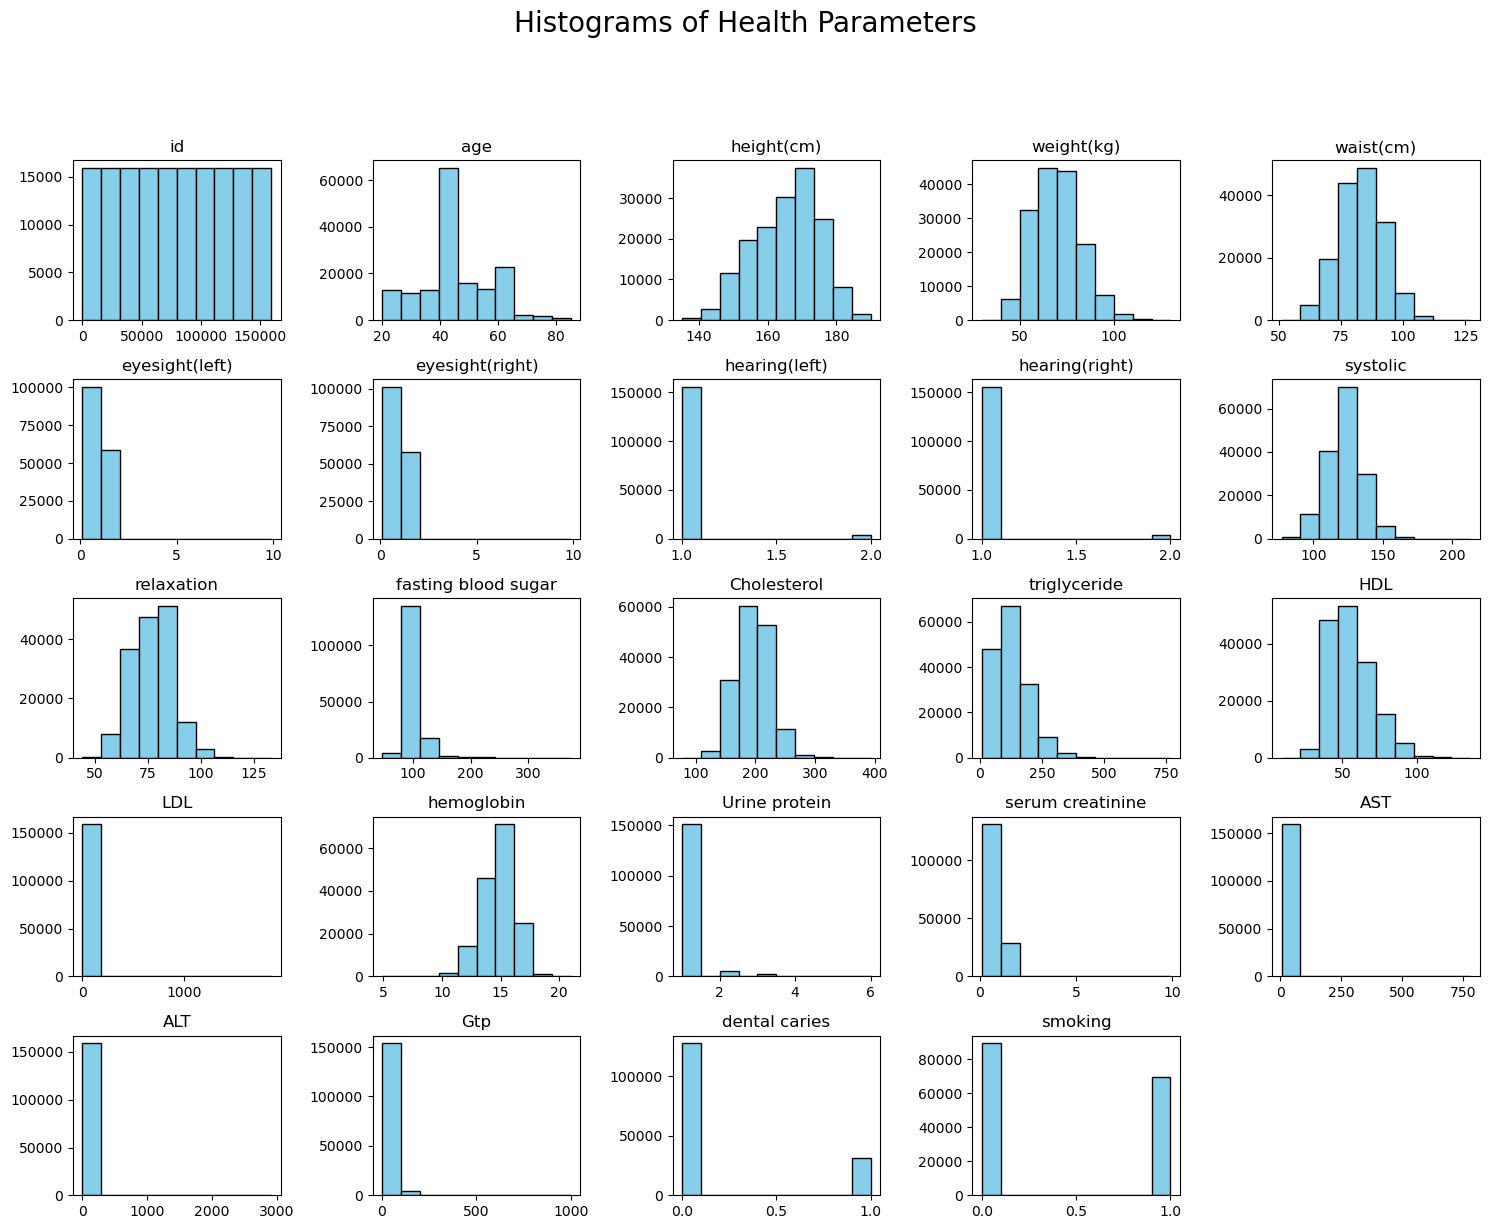

In [9]:
import matplotlib.pyplot as plt

# 'data' is our DataFrame
plt.figure(figsize=(15, 12))
data.hist(figsize=(15,12), grid=False, color='skyblue', edgecolor='black')

# Add titles and labels
plt.suptitle('Histograms of Health Parameters', x=0.5, y=1.02, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for titles

# Display the plot
plt.show()


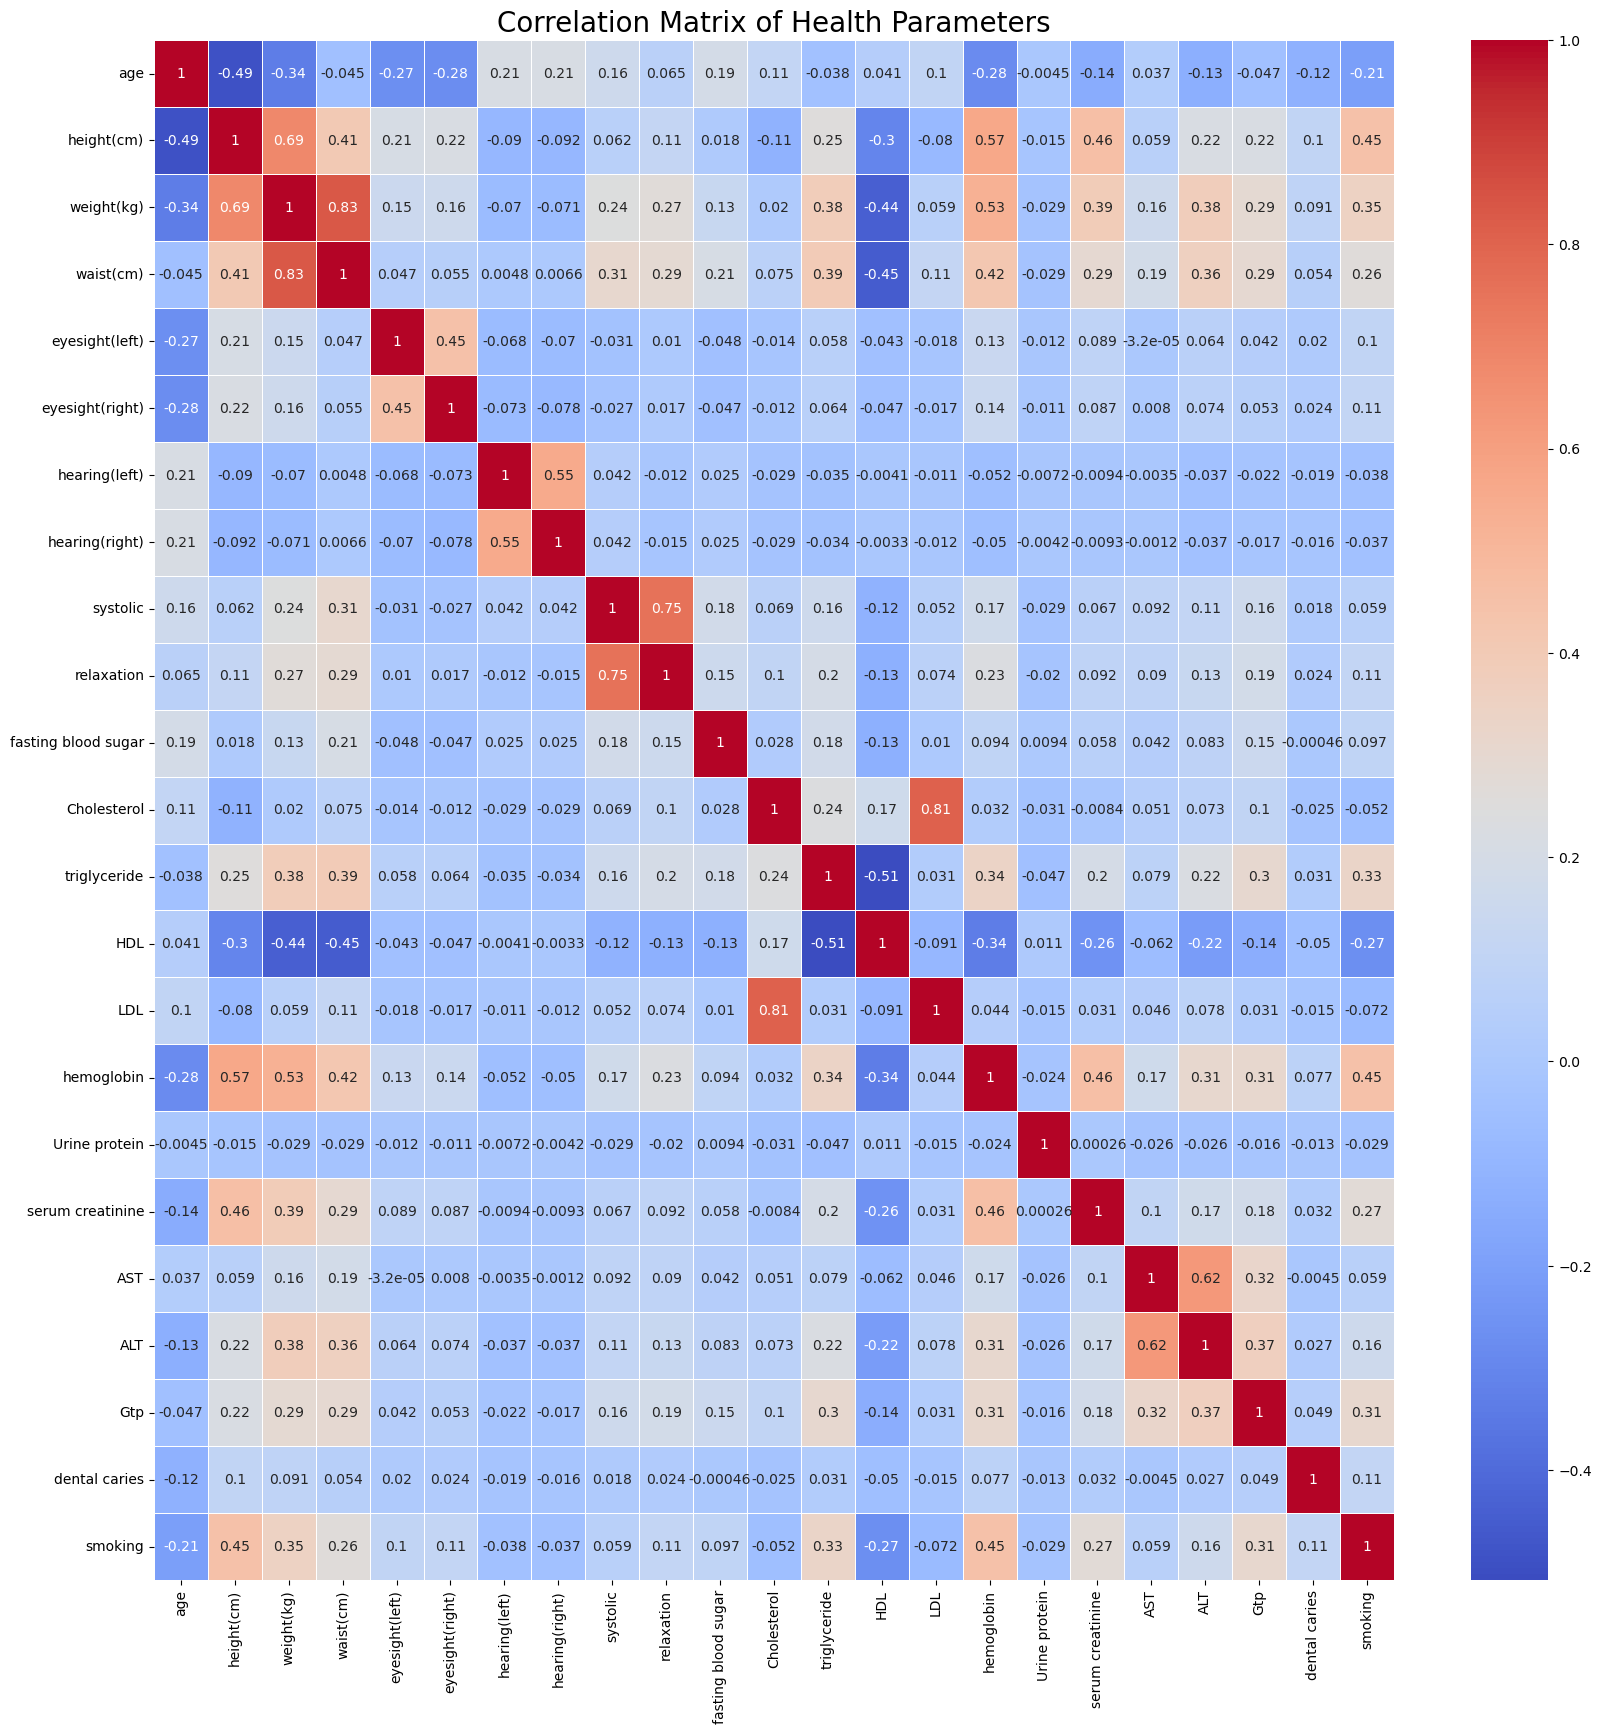

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'data' is our DataFrame
plt.figure(figsize=(20, 20))

# Calculate the correlation matrix excluding the 'id' column
corr_matrix = data.drop(['id'], axis=1).corr()

# Choose a different color palette (for example, 'coolwarm')
sns.heatmap(corr_matrix, annot=True, fmt='.2g', cmap='coolwarm', linewidths=0.4)

# Add a title
plt.title("Correlation Matrix of Health Parameters", fontsize=20)

# Display the plot
plt.show()


### The HeatMap of correlation matrix represents the relationships between various health parameters. Here's a            summary of notable correlations:

1. **Age:**
   - Negatively correlated with height, weight, waist circumference, eyesight, and smoking.
   - Positively correlated with hearing, systolic and diastolic blood pressure, fasting blood sugar, cholesterol, triglyceride, LDL cholesterol, hemoglobin, ALT, and Gtp.

2. **Height:**
   - Positively correlated with weight, waist circumference, eyesight, hearing, systolic and diastolic blood pressure, and hemoglobin.
   - Negatively correlated with age, eyesight (left and right), and smoking.

3. **Weight:**
   - Positively correlated with height, waist circumference, eyesight, hearing, systolic and diastolic blood pressure, fasting blood sugar, cholesterol, triglyceride, LDL cholesterol, hemoglobin, AST, ALT, Gtp, dental caries, and smoking.
   - Negatively correlated with age and HDL cholesterol.

4. **Waist Circumference:**
   - Positively correlated with height, weight, eyesight, hearing, systolic and diastolic blood pressure, fasting blood sugar, cholesterol, triglyceride, LDL cholesterol, hemoglobin, AST, ALT, Gtp, dental caries, and smoking.
   - Negatively correlated with age and HDL cholesterol.

5. **Eyesight (Left and Right):**
   - Positively correlated with height, weight, waist circumference, and hemoglobin.
   - Negatively correlated with age and smoking.

6. **Hearing (Left and Right):**
   - Positively correlated with age, height, weight, waist circumference, and diastolic blood pressure.
   - Negatively correlated with smoking.

7. **Blood Pressure (Systolic and Diastolic):**
   - Positively correlated with age, height, weight, waist circumference, hearing, fasting blood sugar, cholesterol, triglyceride, LDL cholesterol, hemoglobin, AST, ALT, Gtp, dental caries, and smoking.

8. **Fasting Blood Sugar:**
   - Positively correlated with age, weight, waist circumference, cholesterol, triglyceride, LDL cholesterol, and smoking.
   - Negatively correlated with HDL cholesterol.

9. **Cholesterol, Triglyceride, HDL, LDL:**
   - Intercorrelations among these parameters are observed.

10. **Hemoglobin:**
    - Positively correlated with age, height, weight, waist circumference, and eyesight.
    - Negatively correlated with HDL cholesterol.

11. **Liver Enzymes (AST, ALT, Gtp):**
    - Positively correlated with weight, waist circumference, systolic and diastolic blood pressure, fasting blood sugar, cholesterol, triglyceride, LDL cholesterol, hemoglobin, dental caries, and smoking.

12. **Dental Caries:**
    - Positively correlated with weight, waist circumference, systolic and diastolic blood pressure, fasting blood sugar, cholesterol, triglyceride, LDL cholesterol, hemoglobin, AST, ALT, Gtp, and smoking.

13. **Smoking:**
    - Positively correlated with age, weight, waist circumference, eyesight, and liver enzymes.
    - Negatively correlated with height.

                                 - - - - - - - - X X X X X X X X - - - - - - - -

In [11]:
import pandas as pd

def remove_outliers(df, columns=None, multiplier=1.5):
    
    columns = df.columns if columns is None else columns

   
    cleaned_df = df.copy()

    # Iterate through specified columns
    for column in columns:
        # Calculate IQR for the column
        Q1, Q3 = df[column].quantile([0.25, 0.75])
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Remove outliers from the column
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    return cleaned_df


In [12]:
# Applying Function
df = remove_outliers(data)

# Droping "id" column from our data frame
df.drop(columns=['id'],inplace=True)

df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1
6,45,160,55,69.0,1.5,1.2,1,1,150,88,84,222,153,69,122,13.0,1,0.7,17,12,16,0,0
8,40,165,70,89.0,0.7,1.0,1,1,130,80,104,243,163,59,150,15.7,1,0.9,24,21,31,0,1
11,50,160,45,64.0,1.2,1.5,1,1,105,73,85,217,50,81,126,13.6,1,0.8,25,17,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159249,40,170,85,91.4,1.2,0.9,1,1,110,68,91,220,248,45,125,16.1,1,0.9,26,44,37,0,1
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,0
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,1


<Figure size 1500x1200 with 0 Axes>

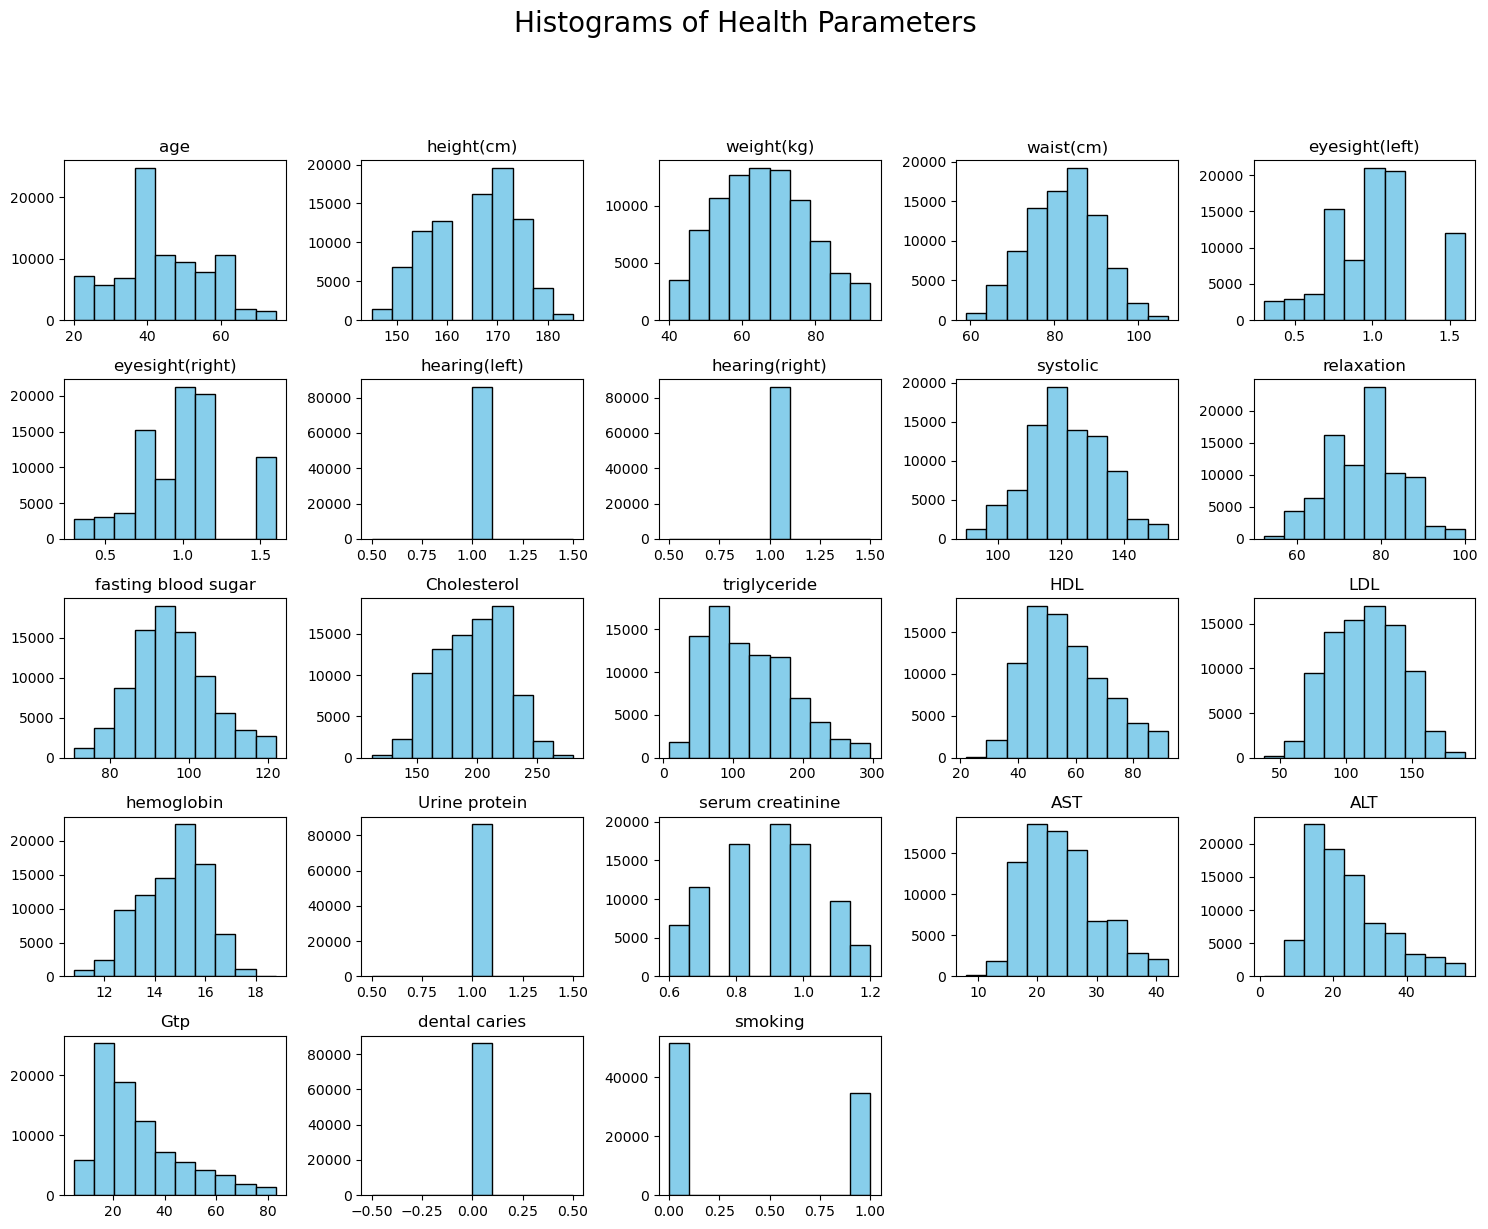

In [13]:
import matplotlib.pyplot as plt

# 'df' is our DataFrame
plt.figure(figsize=(15, 12))
df.hist(figsize=(15,12), grid=False, color='skyblue', edgecolor='black')

# Add titles and labels
plt.suptitle('Histograms of Health Parameters', x=0.5, y=1.02, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for titles

# Display the plot
plt.show()


### After removing outliers, our data is now well distributed.

                                 - - - - - - - - X X X X X X X X - - - - - - - -

In [14]:
# Examining the values counts for categorical columns after applying the outlier removal function
print(df['Urine protein'].value_counts())
print('---------------***---------------')

print(df['hearing(left)'].value_counts())
print('---------------***---------------')

print(df['hearing(right)'].value_counts())
print('---------------***---------------')

print(df['dental caries'].value_counts())
print('---------------***---------------')

print(df['eyesight(left)'].value_counts())
print('---------------***---------------')

print(df['eyesight(right)'].value_counts())
print('---------------***---------------')

print(df['smoking'].value_counts())

1    86188
Name: Urine protein, dtype: int64
---------------***---------------
1    86188
Name: hearing(left), dtype: int64
---------------***---------------
1    86188
Name: hearing(right), dtype: int64
---------------***---------------
0    86188
Name: dental caries, dtype: int64
---------------***---------------
1.0    21001
1.2    20549
1.5    11949
0.8     8301
0.9     8233
0.7     6991
0.6     3643
0.5     2888
0.4     1629
0.3      992
1.6        7
1.3        5
Name: eyesight(left), dtype: int64
---------------***---------------
1.0    21293
1.2    20336
1.5    11471
0.8     8602
0.9     8352
0.7     6603
0.6     3617
0.5     3129
0.4     1827
0.3      945
1.6       11
1.3        2
Name: eyesight(right), dtype: int64
---------------***---------------
0    51565
1    34623
Name: smoking, dtype: int64


In [15]:
# Again we are going to drop the few columns
df.drop(columns=['dental caries',
                 'hearing(right)',
                 'hearing(left)',
                 'Urine protein',],
        inplace=True)
# Checking Shape
df.shape

(86188, 19)

### Why, We drop these columns..!
1) Urine protein, 
2) hearing (left & right) and 
3) dental caries 


are among the most important features for predicting smoking status. Urine protein is a measure of kidney function, and smoking can damage the kidneys and cause proteinuria. Hearing (left) is a measure of hearing ability in the left ear, and smoking can impair hearing by affecting blood flow to the inner ear. Dental caries are tooth decay, and smoking can increase the risk of dental caries by reducing saliva flow and altering the oral microbiome.

However, these features are not the only ones that are relevant for smoking prediction. 

Other factors such as 

1) age, 

2) gender, 

3) cholesterol, 

4) triglyceride, 

5) HDL, 

6) LDL, 

7) hemoglobin, 

8) serum creatinine, 

9) AST, 

10) ALT, 

11) Gtp, and etc.

also have significant effects on smoking. Therefore, it is important to consider the whole picture when analyzing the impact of smoking on health.

                                 - - - - - - - - X X X X X X X X - - - - - - - -

# Feature Selection..!

In [16]:
# Define X and Y Variable
Y = df[['smoking']]
X = df.drop(columns=['smoking'])


# Applying Select K Best class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_features = SelectKBest(score_func=chi2,
                            k=10)
fit = best_features.fit(X,
                        Y)

# Now Extracting Scores
df_score = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

# Now Concate two df for better visualization
feature_score = pd.concat([df_score,
                           df_columns],
                           axis=1)
feature_score.columns = ["Feature Score", 
                         "Features"]
feature_score.sort_values(by = 'Feature Score', ascending=False)

,Feature Score,Features
10,281793.341166,triglyceride
17,105209.762670,Gtp
11,22564.058780,HDL
2,20391.888241,weight(kg)
16,11361.766900,ALT
0,9467.027249,age
1,7784.131536,height(cm)
12,4563.341768,LDL
3,4519.713833,waist(cm)
9,2367.667142,Cholesterol


In [17]:
# Extracting Columns Name
print(feature_score['Features'].values)

# New Df
newdf = df[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'smoking']]
newdf.head()

['age' 'height(cm)' 'weight(kg)' 'waist(cm)' 'eyesight(left)'
 'eyesight(right)' 'systolic' 'relaxation' 'fasting blood sugar'
 'Cholesterol' 'triglyceride' 'HDL' 'LDL' 'hemoglobin' 'serum creatinine'
 'AST' 'ALT' 'Gtp']


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,smoking
2,20,170,75,81.0,0.4,0.5,118,75,79,178,197,45,93,17.4,0.8,27,31,53,1
4,30,165,60,80.5,1.5,1.0,121,76,91,155,87,44,93,15.4,0.8,19,13,17,1
6,45,160,55,69.0,1.5,1.2,150,88,84,222,153,69,122,13.0,0.7,17,12,16,0
8,40,165,70,89.0,0.7,1.0,130,80,104,243,163,59,150,15.7,0.9,24,21,31,1
11,50,160,45,64.0,1.2,1.5,105,73,85,217,50,81,126,13.6,0.8,25,17,15,0


In [18]:
# Checking shape again
newdf.shape

(86188, 19)

                                 - - - - - - - - X X X X X X X X - - - - - - - -

# Model Building..!

In [19]:
# Define X and Y Variable
Y = newdf[['smoking']]
X = newdf.drop(columns=['smoking'])

#### Splitting the data into X and Y Train and test

In [20]:
# Splitting the data into X and Y Train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=42)
# len of our splitted data
len(X_train),len(X_test),len(Y_train),len(Y_test)

(60331, 25857, 60331, 25857)

                                 - - - - - - - - X X X X X X X X - - - - - - - -

# Random forest

In [21]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state= 42,
                             n_estimators= 500,
                             criterion='log_loss',
                             max_features="sqrt",
                             bootstrap=True,
                             n_jobs=-1)
mdl = rfc.fit(X_train,
                    Y_train)
mdl

# Prediction
Y_test['Pred_RF'] = mdl.predict(X_test)

# for random forest
print("Random Forest")
print(classification_report(Y_test["smoking"],Y_test["Pred_RF"]))

Random Forest
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     15400
           1       0.69      0.77      0.73     10457

    accuracy                           0.77     25857
   macro avg       0.76      0.77      0.77     25857
weighted avg       0.78      0.77      0.77     25857



In [22]:
# Predict on training data
Y_train_pred = mdl.predict(X_train)

from sklearn.metrics import accuracy_score

# Calculate accuracy on training data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 1.00


                                 - - - - - - - - X X X X X X X X - - - - - - - -

# DecisionTreeClassifier

In [23]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier


# DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', 
                                  max_depth=7,
                                  min_samples_leaf=20, 
                                  min_samples_split=4)

mdltree_clf = tree_clf.fit(X_train,
                    Y_train)
mdltree_clf

# Prediction
Y_test['Pred_dtree'] = mdltree_clf.predict(X_test)

# for DecisionTreeClassifier
print("Decision Tree Classifier")
print(classification_report(Y_test["smoking"],Y_test["Pred_dtree"]))

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.82      0.74      0.78     15400
           1       0.67      0.76      0.71     10457

    accuracy                           0.75     25857
   macro avg       0.75      0.75      0.75     25857
weighted avg       0.76      0.75      0.75     25857



In [24]:
# Predict on training data
Y_train_pred = mdltree_clf.predict(X_train)

from sklearn.metrics import accuracy_score

# Calculate accuracy on training data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 0.76


                                 - - - - - - - - X X X X X X X X - - - - - - - -

# ExtraTree Classifiers

In [25]:
# ExtraTree Classifiers
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=500,
                              max_features="sqrt",
                                           n_jobs=-1,
                                              random_state=42)

model_etc = etc.fit(X_train,
                    Y_train)

# Prediction
Y_test['Pred_ExtraTree'] = model_etc.predict(X_test)

# ExtraTree
print("ExtraTree Classifiers")
print(classification_report(Y_test["smoking"],Y_test["Pred_ExtraTree"]))

ExtraTree Classifiers
              precision    recall  f1-score   support

           0       0.84      0.76      0.80     15400
           1       0.69      0.78      0.73     10457

    accuracy                           0.77     25857
   macro avg       0.76      0.77      0.76     25857
weighted avg       0.78      0.77      0.77     25857



In [26]:
# Predict on training data
Y_train_pred = model_etc.predict(X_train)


from sklearn.metrics import accuracy_score

# Calculate accuracy on training data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 1.00


                                 - - - - - - - - X X X X X X X X - - - - - - - -

# AdaBoost Classifier

In [27]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=500,
                           algorithm='SAMME.R',
                               learning_rate=1.0,
                                   random_state=42)

model_abc = abc.fit(X_train,
                    Y_train)
model_abc

# Prediction
Y_test['Pred_AdB'] = model_abc.predict(X_test)

# AdaBoost
print('AdaBoost')
print(classification_report(Y_test['smoking'],Y_test['Pred_AdB']))

AdaBoost
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     15400
           1       0.70      0.75      0.72     10457

    accuracy                           0.77     25857
   macro avg       0.76      0.76      0.76     25857
weighted avg       0.77      0.77      0.77     25857



In [28]:
# Predict on training data
Y_train_pred = model_abc.predict(X_train)

from sklearn.metrics import accuracy_score

# Calculate accuracy on training data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.78


                                 - - - - - - - - X X X X X X X X - - - - - - - -

# GradiantBoost Classifier

In [29]:
# GradiantBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100,
                                    loss='log_loss',
                                     learning_rate=1.0, 
                                       random_state=42)

model_gbc = gbc.fit(X_train,
                    Y_train)
model_gbc

# Prediction
Y_test['Pred_GBC'] = model_gbc.predict(X_test)


# GradiantBoost
from sklearn.metrics import classification_report
print("GradiantBoost Classifiers")
print(classification_report(Y_test["smoking"],Y_test["Pred_GBC"]))

GradiantBoost Classifiers
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     15400
           1       0.70      0.75      0.73     10457

    accuracy                           0.77     25857
   macro avg       0.76      0.77      0.76     25857
weighted avg       0.77      0.77      0.77     25857



In [30]:
# Predict on training data
Y_train_pred = model_gbc.predict(X_train)

from sklearn.metrics import accuracy_score

# Calculate accuracy on training data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")


Training Accuracy: 0.80


                                 - - - - - - - - X X X X X X X X - - - - - - - -

# XGBoost Classifier

In [31]:
# XGBoost Classifier
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(n_estimators=600, 
                                   learning_rate=1.0,
                                     random_state=42)

model_xgb = xgb_classifier.fit(X_train,
                    Y_train)

# Prediction
Y_test['Pred_xgb'] = model_xgb.predict(X_test)

# XGBoost
print("XGBoost Classifiers")
print(classification_report(Y_test["smoking"],Y_test["Pred_xgb"]))

XGBoost Classifiers
              precision    recall  f1-score   support

           0       0.79      0.78      0.78     15400
           1       0.68      0.69      0.69     10457

    accuracy                           0.74     25857
   macro avg       0.73      0.74      0.73     25857
weighted avg       0.74      0.74      0.74     25857



In [32]:
# Predict on training data
Y_train_pred = model_xgb.predict(X_train)

from sklearn.metrics import accuracy_score

# Calculate accuracy on training data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 1.00


                                 - - - - - - - - X X X X X X X X - - - - - - - -

# Naive Beays Model

In [33]:
#  Naive Beays Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_nb = nb.fit(X_train,
                    Y_train)
model_nb

# Prediction
Y_test["Predict_nb"] = model_nb.predict(X_test)

# Naive Beays
from sklearn.metrics import classification_report
print(classification_report(Y_test["smoking"],Y_test["Predict_nb"]))

              precision    recall  f1-score   support

           0       0.82      0.68      0.75     15400
           1       0.63      0.79      0.70     10457

    accuracy                           0.72     25857
   macro avg       0.73      0.73      0.72     25857
weighted avg       0.74      0.72      0.73     25857



In [34]:
# Predict on training data
Y_train_pred = model_nb.predict(X_train)

from sklearn.metrics import accuracy_score

# Calculate accuracy on training data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.72


                                 - - - - - - - - X X X X X X X X - - - - - - - -

# KNN Model

In [35]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
robust_scaler = RobustScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = robust_scaler.fit_transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)


In [36]:
import numpy as np

# Check and enforce contiguity
X_train_contig = np.ascontiguousarray(X_train_scaled)
X_test_contig = np.ascontiguousarray(X_test_scaled)

In [37]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=73, 
                           p=1, 
                           weights='distance')

model_knn = knn.fit(X_train_contig, 
                    Y_train)

# Prediction
Y_test["Predict_knn"] = model_knn.predict(X_test_contig)

# KNN
from sklearn.metrics import classification_report
print(classification_report(Y_test["smoking"],Y_test["Predict_knn"]))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79     15400
           1       0.68      0.79      0.73     10457

    accuracy                           0.76     25857
   macro avg       0.76      0.76      0.76     25857
weighted avg       0.77      0.76      0.76     25857



In [38]:
# Predict on training data
Y_train_pred = model_knn.predict(X_train_contig)

from sklearn.metrics import accuracy_score

# Calculate accuracy on training data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 1.00


                                 - - - - - - - - X X X X X X X X - - - - - - - -

# Logistic Model

In [39]:
# Importing modules
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(solver='saga',
                                 random_state=42)

# Train the model
model_logreg = logreg.fit(X_train,
                            Y_train)

# Prediction
Y_test["Predict_logi"] = model_logreg.predict(X_test)

# Logi_ regrssion
from sklearn.metrics import classification_report
print(classification_report(Y_test["smoking"],Y_test["Predict_logi"]))


              precision    recall  f1-score   support

           0       0.77      0.79      0.78     15400
           1       0.68      0.65      0.66     10457

    accuracy                           0.73     25857
   macro avg       0.72      0.72      0.72     25857
weighted avg       0.73      0.73      0.73     25857



In [40]:
# Predict on training data
Y_train_pred = model_logreg.predict(X_train)

from sklearn.metrics import accuracy_score

# Calculate accuracy on training data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.74


                                 - - - - - - - - X X X X X X X X - - - - - - - -

# Importing Test Data..!

In [41]:
# Importing Test Data Sets
import pandas as pd
test_data = pd.read_csv('test.csv')
test_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,89,107,200,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,72,93,172,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,75,92,161,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,62,91,213,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,94,79,170,100,39,123,16.5,1,1.0,30,39,27,1


In [42]:
# Taking only those columns that are present in the "newdf" and droping unwanted columns.

test = test_data[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
                         'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
                         'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine',
                         'AST', 'ALT', 'Gtp']]
test.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp
0,40,165,70,84.0,1.2,1.2,130,89,107,200,186,49,115,14.2,0.9,19,25,32
1,80,160,60,93.0,1.0,1.0,144,72,93,172,158,35,104,13.0,1.1,20,12,24
2,60,170,70,86.5,0.6,0.7,117,75,92,161,173,39,88,15.4,1.4,38,60,36
3,40,160,50,67.0,0.3,0.4,116,62,91,213,47,75,128,14.5,0.6,25,18,10
4,40,170,75,89.4,1.0,0.9,132,94,79,170,100,39,123,16.5,1.0,30,39,27


In [43]:
# shape
test.shape

(106171, 18)

                                 - - - - - - - - X X X X X X X X - - - - - - - -

#### Outlier Removal for test Data..!

In [44]:
import pandas as pd

def remove_outliers(df, columns=None, multiplier=1.5):
   
    columns = df.columns if columns is None else columns

    # Copy the original DataFrame
    cleaned_df = df.copy()

    # Iterate through specified columns
    for column in columns:
        # Calculate IQR for the column
        Q1, Q3 = df[column].quantile([0.25, 0.75])
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Remove outliers from the column
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

    return cleaned_df

In [45]:
# Applying Function
df_test = remove_outliers(test)
df_test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp
0,40,165,70,84.0,1.2,1.2,130,89,107,200,186,49,115,14.2,0.9,19,25,32
3,40,160,50,67.0,0.3,0.4,116,62,91,213,47,75,128,14.5,0.6,25,18,10
4,40,170,75,89.4,1.0,0.9,132,94,79,170,100,39,123,16.5,1.0,30,39,27
5,40,165,55,75.8,1.0,1.0,94,52,104,179,146,41,108,15.1,1.0,27,15,56
6,40,165,80,87.0,1.5,1.5,128,72,106,225,95,46,160,15.5,1.0,24,30,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106165,40,175,55,68.0,1.2,1.2,134,84,117,148,64,53,82,13.8,0.9,20,13,19
106167,40,170,85,95.0,1.2,1.2,130,90,97,180,186,44,100,16.0,1.0,25,31,38
106168,35,170,85,89.0,1.2,1.2,131,86,106,211,76,53,142,15.9,0.8,33,32,24
106169,40,160,60,67.0,0.7,0.8,120,80,92,175,81,55,103,13.9,0.6,42,36,32


In [46]:
df_test=df_test.head(25857)

                                 - - - - - - - - X X X X X X X X - - - - - - - -

## Prediction On Test Data..!

In [47]:
# AdaBoost Classifier for Prediction
Y_test["Predict_test"] = model_abc.predict(df_test)

In [48]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test["smoking"],Y_test["Predict_test"]))

[[8649 6751]
 [5951 4506]]


In [49]:
# Your test data
test_data = pd.DataFrame({'age': [40],
                            'height(cm)': [165],
                            'weight(kg)': [70],
                            'waist(cm)': [84],
                            'eyesight(left)': [1.2],
                            'eyesight(right)': [1.2],
                            'systolic': [130],
                            'relaxation': [89],
                            'fasting blood sugar': [107],
                            'Cholesterol': [200],
                            'triglyceride': [186],
                            'HDL': [49],
                            'LDL': [115],
                            'hemoglobin': [14.2],
                            'serum creatinine': [0.9],
                            'AST': [19],
                            'ALT': [25],
                            'Gtp': [32] })

# Make predictions
predictions = model_abc.predict(test_data)

# Print the predictions
print(predictions)


[1]


In [50]:
# New test data entry
new_data = pd.DataFrame({
    'age': [40],
    'height(cm)': [145],
    'weight(kg)': [45],
    'waist(cm)': [76.4],
    'eyesight(left)': [1],
    'eyesight(right)': [1.2],
    'systolic': [125],
    'relaxation': [87],
    'fasting blood sugar': [83],
    'Cholesterol': [186],
    'triglyceride': [87],
    'HDL': [87],
    'LDL': [81],
    'hemoglobin': [14],
    'serum creatinine': [0.8],
    'AST': [21],
    'ALT': [16],
    'Gtp': [17]
})

# Make predictions
predictions_new_data = model_abc.predict(new_data)

# Print the predictions for the new data entry
print(predictions_new_data)


[0]


                                 - - - - - - - - X X X X X X X X - - - - - - - -